In [82]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import openpyxl
import statsmodels.api as sm
from numpy import inf
from statistics import mean

import os
cwd = os.getcwd()
file = 'wake_exercise.csv'
df = pd.read_csv(file)

The dataset "wake_exercise" holds records of sales of 38,817 single family homes in Wake County, NC, during 1998 and 1999. There are 37 variables including the purchase price and natural log of price, property characteristics such as number of bathrooms, size of garage, and the condition of the house, as well as the location of the property and the environmental attribute measuring the distance to a lake. 

# Problem 18.1
To get a better understanding of the data, I have selected a few variables out of the whole data to look at their summary statistics. We are interested in looking at how the purchase price of a property in Wake County, NC is affected by the variables in the data. Below is the summary statistics of nine variables including the purchase price, natural log of purchase price, the heated area in sq ft as living area, the number of bathrooms, the age in years, the presence of a fireplace, the size of a garage in sq ft, the lot size in acres, and the distance to the nearest lake in feet. 

In [84]:
df.describe()
df2 = df[['price','lprice','living_area',
          'baths','age','fireplace',
          'garage_area','acres','lakedist']]
df2.describe()

,price,lprice,living_area,baths,age,fireplace,garage_area,acres,lakedist
count,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000
mean,180258.842646,12.024953,1914.428858,2.462310,11.365896,0.896308,289.631965,0.449827,17.190692
std,75585.306412,0.385866,681.540197,0.678926,15.058214,0.304864,248.873254,0.621009,11.787929
min,56000.000000,10.933107,560.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,126500.000000,11.747997,1380.000000,2.000000,1.000000,1.000000,0.000000,0.210000,8.557596
50%,160000.000000,11.982929,1777.000000,2.500000,6.000000,1.000000,378.000000,0.290000,14.110399
75%,217000.000000,12.287653,2343.000000,2.500000,14.000000,1.000000,484.000000,0.460000,23.198748
max,501000.000000,13.124361,5349.000000,7.000000,98.000000,1.000000,1724.000000,26.370001,67.445343


Some data plots to visualize the frequency of the variables

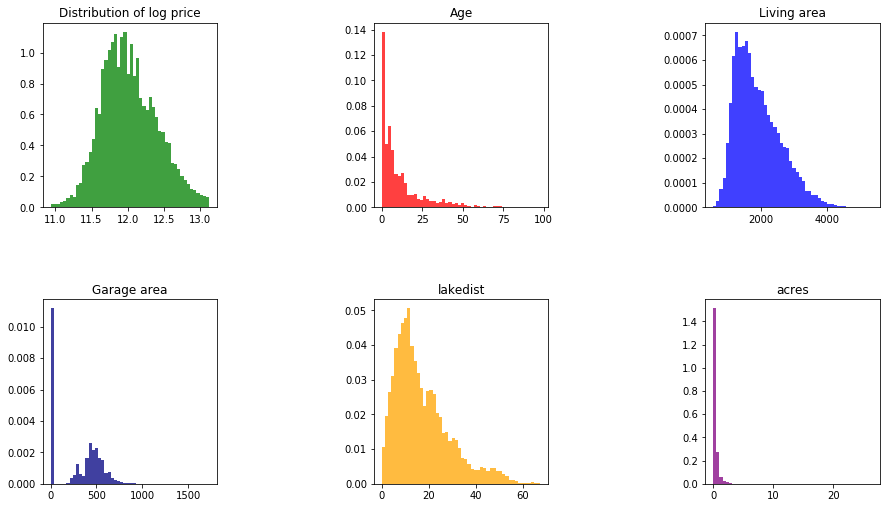

In [13]:
# Frequency plots
f = plt.figure(figsize=(15,8))
plt.subplot(231)
n, bins, patches = plt.hist(df2.lprice, 50, density=1,
                            facecolor='g', alpha=0.75)
plt.title('Distribution of log price')

plt.subplot(232)
n, bins, patches = plt.hist(df2.age, 50, density=1,
                            facecolor='r', alpha=0.75)
plt.title('Age')

plt.subplot(233)
n, bins, patches = plt.hist(df2.living_area, 50, density=1, 
                            facecolor='b', alpha=0.75)
plt.title('Living area')

plt.subplot(234)
n, bins, patches = plt.hist(df2.garage_area, 50, density=1, 
                            facecolor='navy', alpha=0.75)
plt.title('Garage area')

plt.subplot(235)
n, bins, patches = plt.hist(df2.lakedist, 50, density=1, 
                            facecolor='orange', alpha=0.75)
plt.title('lakedist')

plt.subplot(236)
n, bins, patches = plt.hist(df2.acres, 50, density=1, 
                            facecolor='purple', alpha=0.75)
plt.title('acres')

plt.subplots_adjust(top=0.90, bottom=0.1, left=0.125, 
                    right=0.9, hspace=0.50,wspace=0.90)
plt.show()

A regression with living area, baths, age, fireplace, garage area, and acres as the explanatory variables for log price.

In [85]:
Y = df['lprice']
X1 = df[['living_area','baths','age',
          'fireplace','garage_area','acres']]
X1 = sm.add_constant(X1)
ols = sm.OLS(Y, X1).fit()
predictions = ols.predict()
residuals = ols.resid
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.301e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:40:12   Log-Likelihood:                 11325.
No. Observations:               38817   AIC:                        -2.264e+04
Df Residuals:                   38810   BIC:                        -2.258e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.8737      0.005   2339.150      0.000      10.865      10.883
living_area     0.0004   2.03e-06    185.665      0.000       0.000       0.000
baths           0.0775      0.002     42.976      0.000       0.074       0.081
age             0.0040   7.09e-05     56.219      0.000       0.004       0.004
fireplace       0.1081      0.003     33.386      0.000       0.102       0.114
garage_area     0.0003   5.31e-06     53.664      0.000       0.000       0.000
acres           0.0335      0.002     22.269      0.000       0.031       0.036
==============================================================================
Omnibus:                     3299.730   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15400.744
Skew:                           0.294   Prob(JB):                         0.00
Kurtosis:                       6.029   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Estimation of the parameters using OLS
\begin{multline*}
ln p_i = \beta_0 + \beta_1 \times living\_area_i + 
\beta_2 \times baths_i + \beta_3 \times age_i +\\ 
\beta_4 \times fireplace_i + \beta_5 \times garage\_area_i +
\sum_{k=A}^{C} \beta_{6k}condk_i + \epsilon_i
\end{multline*}

In [86]:
Y = df['lprice']
X = df[['living_area','baths','age','fireplace',
         'garage_area','condA','condB','condC']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict()
residuals = model.resid
model.summary()
#print(round(model.params,3))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 2.050e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:40:21   Log-Likelihood:                 13982.
No. Observations:               38817   AIC:                        -2.795e+04
Df Residuals:                   38808   BIC:                        -2.787e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6508      0.018    604.413      0.000      10.616      10.685
living_area     0.0004   1.89e-06    197.757      0.000       0.000       0.000
baths           0.0735      0.002     43.584      0.000       0.070       0.077
age             0.0025   7.45e-05     33.861      0.000       0.002       0.003
fireplace       0.0959      0.003     31.612      0.000       0.090       0.102
garage_area     0.0003   4.95e-06     60.241      0.000       0.000       0.000
condA           0.5462      0.017     31.471      0.000       0.512       0.580
condB           0.2664      0.017     15.528      0.000       0.233       0.300
condC           0.1161      0.018      6.517      0.000       0.081       0.151
==============================================================================
Omnibus:                     4313.337   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19585.524
Skew:                           0.466   Prob(JB):                         0.00
Kurtosis:                       6.353   Cond. No.                     8.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared of the model improved from the model estimated previously with the model now explaining about 99.8% of the variation in the dependent variable, lprice. Moreover, all of the coefficients are statistically significant with p-value = 0.000.
All of the coefficients are positive as anticipated, which implies that our explanatory variables positively impact the dependent variable, the log of purchase price. Given the log-linear model, the coefficients are interpreted as the percentage increase in purchase price for a unit increase in the explanatory variable. For example, the coefficient on baths, $\beta_2 = 0.0735$, means that the purchase price increases by 7.35 percent for an additional unit of bath. The condition of the house has the biggest impact on the purchase price, with the best condition, A, being responsible for an increase of 54.62 percent of the purchase price.<br><br>
Based on this regression, the marginal implicit price of an additional square foot of living area is:
\begin{equation}
\frac{\partial \widehat{P}}{\partial q_i} = \frac{\partial \widehat{P}}{\partial living\_area_i} = \beta_1 p_i = 0.0004 p_i
\end{equation}

# Problem 18.2
Using the variable $lakedist$, which measures the distance in hundreds of meters from the property to the nearest lake as a proxy for the value of access to lake-based amenities in a first stage hedonic regression. 

Estimating the baseline model with $lakedist$ and natural log of $lakedist$ as $lnlakedist$
\begin{multline*}
ln p_i = \beta_0 + \beta_1 \times living\_area_i + 
\beta_2 \times baths_i + \beta_3 \times age_i + \\
\beta_4 \times fireplace_i + \beta_5 \times garage\_area_i +\\
\sum_{k=A}^{C} \beta_{6k}condk_i + \beta_7 \times lakedist_i + \beta_8 \times lnlakedist_i +\epsilon_i
\end{multline*}

First, we will create the new variable $lnlakedist$ by taking the natural log of $lakedist$ variable. Some of the data points of $lakedist$ are equal to 0 so the $lnlakedist$ goes to $-\infty$. To handle those data points, I will assign a negative number that is lower than the lowest value of $lnlakedist$.  

In [33]:

df['lnlakedist'] = np.log(df['lakedist'])
a = df['lnlakedist']
#np.where(np.isinf(df2.lnlakedist))
np.min(a[a != -np.inf])

-9.100974886925474

In [35]:
df.lnlakedist[df.lnlakedist == -inf] = -10
X = df[['living_area','baths','age','fireplace',
         'garage_area','condA','condB','condC',
        'lakedist','lnlakedist']]
X = sm.add_constant(X)
Y = df['lprice']
model2 = sm.OLS(Y, X).fit()
predictions2 = model2.predict()
model2.summary()
#print(round(model.params,3))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 1.665e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:39:11   Log-Likelihood:                 14219.
No. Observations:               38817   AIC:                        -2.842e+04
Df Residuals:                   38806   BIC:                        -2.832e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.7061      0.018    599.999      0.000      10.671      10.741
living_area     0.0004   1.88e-06    196.872      0.000       0.000       0.000
baths           0.0697      0.002     41.339      0.000       0.066       0.073
age             0.0023   7.46e-05     31.292      0.000       0.002       0.002
fireplace       0.0954      0.003     31.618      0.000       0.089       0.101
garage_area     0.0003   4.93e-06     61.634      0.000       0.000       0.000
condA           0.5410      0.017     31.358      0.000       0.507       0.575
condB           0.2588      0.017     15.175      0.000       0.225       0.292
condC           0.1154      0.018      6.515      0.000       0.081       0.150
lakedist       -0.0014      0.000    -11.882      0.000      -0.002      -0.001
lnlakedist     -0.0030      0.002     -1.954      0.051      -0.006     8.9e-06
==============================================================================
Omnibus:                     4363.991   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20262.620
Skew:                           0.466   Prob(JB):                         0.00
Kurtosis:                       6.415   Cond. No.                     8.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared went down from the base model, which implies that the base model is better at explaining the variation in the log price. All of the coefficients from the base model including $living\_area, baths, age, fireplace, garage\_area, condA, condB, condC$ remained positive and  statistically significant with p-value = 0.000. So an increase in each of those variables leads to a percent increase of the purchase price by the coefficient values. $\beta_0$ went up while the other coefficients either remained the same or decreased slightly. The coefficients for $baths, age, fireplace, condA, condB, condC$ went down slightly. $lakedist$ is statistically significant and negative meaning that a 100 meter increase in the distance to the nearest lake leads to a $0.14$ percent decrease in purchase price. $lnlakedist$ is also negative but it represents the elasticity of purchase price relative to the distance to nearest lake. However, it is not statistically significant. The condition of the house still has the biggest impact on the purchase price, with the best condition, A, being responsible for an increase of 54.10 percent of the purchase price.<br><br>
Based on this regression, the marginal willingness to pay for access to a lake is:
\begin{equation}
MWTP = \frac{\partial \widehat{P}}{\partial q_i} = \frac{\partial \widehat{P}}{\partial lakedist_i} = \beta_7 p_i +  \beta_8 \frac{p_i}{lakedist_i} =  -0.0014 p_i - 0.0030 \frac{p_i}{lakedist_i} 
\end{equation}
<br>

To get the sample mean marginal willingness to pay for access to a lake, I will use the average p and average distance:
\begin{equation}
MWTP = \bigg\lvert -0.0014 \times 180258.842646 - 0.0030 \frac{180258.842646}{17.190692} \bigg\rvert \\
MWTP = 283.82
\end{equation}

The functional form for distance matters as in this model specification, we have both $lakedist$ and $lnlakedist$, hence the marginal willingness to pay is not just $\beta p_i$ but $\beta_7 p_i +  \beta_8 \frac{p_i}{lakedist_i}$.

The specification includes no variables that account for other spatial aspects such as school quality, access to employment centers, hence the effect of these omitted variables will be contained in the error term leading to $E[\epsilon_i \mid x_i,q_i] \neq 0$ where $x_i$ represents all of the explanatory variables except for $lakedist$ and $lnlakedist$, which are the $q_i$. The estimate of the implicit price of lake access is then biased.

Using the level distance variable $lakedist$, we examine regressions that first add a control variable for commuting time $(median\_commute)$, and then spatial fixed effects  (submarket dummy variabes $zone1,...,zone18$)

Estimating the baseline model with $median\_commute$
\begin{multline*}
ln p_i = \beta_0 + \beta_1 \times living\_area_i + 
\beta_2 \times baths_i + \beta_3 \times age_i + \\
\beta_4 \times fireplace_i + \beta_5 \times garage\_area_i +
\sum_{k=A}^{C} \beta_{6k}condk_i + \beta_7 \times lakedist_i + \beta_8 \times median_commute +\epsilon_i
\end{multline*}

In [87]:
X = df[['living_area','baths','age','fireplace',
         'garage_area','condA','condB','condC',
        'lakedist','median_commute']]
X = sm.add_constant(X)
Y = df['lprice']
model3 = sm.OLS(Y, X).fit()
predictions3 = model3.predict()
#model3.summary()
print("Model 3 parameters with median_commute")
print(round(model3.params,5))

Model 3 parameters with median_commute
const             10.61224
living_area        0.00037
baths              0.06991
age                0.00142
fireplace          0.09559
garage_area        0.00031
condA              0.49256
condB              0.23993
condC              0.11057
lakedist          -0.00103
median_commute     0.00380
dtype: float64


The $lakedist$ coefficient is -0.00103, which means that the purchase price decreases by 0.10 percent if the distance to the nearest lake increases by 100 meters. The marginal implicit price with this model specification is 
\begin{equation}
\frac{\partial \widehat{P}}{\partial lakedist_i} = \beta_7 p_i = 0.00103 p_i
\end{equation}
<br>
At the sample mean price, $MWTP = 0.00103 \times 180258.842646 = 185.67$.

Estimating the baseline model with $median\_commute$ and spatial fixed effects for each zone
\begin{multline*}
ln p_i = \beta_0 + \beta_1 \times living\_area_i + 
\beta_2 \times baths_i + \beta_3 \times age_i + \\
\beta_4 \times fireplace_i + \beta_5 \times garage\_area_i +
\sum_{k=A}^{C} \beta_{6k}condk_i + \beta_7 \times lakedist_i +\\
\beta_8 \times median_commute + 
\theta_1 \times zone1 +\theta_2 \times zone2 +\\
\theta_3 \times zone3+\theta_4 \times zone4+\theta_5 \times zone5+
\theta_6 \times zone6+\theta_7 \times zone7+\\
\theta_8 \times zone8+
\theta_9 \times zone9+\theta_{10} \times zone10+\theta_{11} \times zone11+\\
\theta_{12} \times zone12+\theta_{13} \times zone13+\theta_{14} \times zone14+
\theta_{15} \times zone15+\\
\theta_{16} \times zone16+\theta_{17} \times zone17+
\theta_{18} \times zone18 + \epsilon_i
\end{multline*}

In [81]:
X = df[['living_area','baths','age','fireplace',
         'garage_area','condA','condB','condC',
        'lakedist','median_commute','zone1',
       'zone2','zone3','zone4','zone5','zone6',
       'zone7','zone8','zone9','zone10','zone11',
       'zone12','zone13','zone14','zone15','zone16',
       'zone17','zone18']]
X = sm.add_constant(X)
Y = df['lprice']
model4 = sm.OLS(Y, X).fit()
predictions4 = model4.predict()
#model4.summary()
print("Model 4 parameters with median_commute \\
      and spatial fixed effects")
print(round(model4.params,5))

Model 4 parameters with median_commute and spatial fixed effects
const             10.84141
living_area        0.00035
baths              0.06296
age               -0.00034
fireplace          0.06059
garage_area        0.00028
condA              0.32497
condB              0.17989
condC              0.09127
lakedist          -0.00138
median_commute    -0.00068
zone1              0.41081
zone2              0.16292
zone3             -0.11045
zone4              0.04543
zone5              0.13067
zone6             -0.01422
zone7              0.09841
zone8             -0.00013
zone9              0.10401
zone10             0.09043
zone11            -0.03832
zone12            -0.06832
zone13            -0.05670
zone14             0.06881
zone15             0.09170
zone16             0.01647
zone17             0.03914
zone18             0.05908
dtype: float64


The $lakedist$ coefficient is -0.00138, which means that the purchase price decreases by 0.138 percent if the distance to the nearest lake increases by 100 meters. The marginal implicit price with this model specification is 
\begin{equation}
\frac{\partial \widehat{P}}{\partial lakedist_i} = \beta_7 p_i = 0.00138 p_i
\end{equation}
<br>
At the sample mean price, $MWTP = 0.00138 \times 180258.842646 = 248.76$.

Hence, the marginal implicit price goes up with the model including the spatial fixed effects. The coefficients for $lakedist$ also goes up with the addition of the fixed effects.

Regression including the transformed variable $tr\_dist_i$ with $maxd=10$.<br>

\begin{equation}
tr\_dist_i = max \bigg \{ 1 - \bigg ( \frac{lakedist_i}{maxd} \bigg ) ^{\frac{1}{2}} , 0 \bigg \}  
\end{equation}



\begin{multline*}
ln p_i = \beta_0 + \beta_1 \times living\_area_i + 
\beta_2 \times baths_i + \beta_3 \times age_i + \\
\beta_4 \times fireplace_i + \beta_5 \times garage\_area_i +
\sum_{k=A}^{C} \beta_{6k}condk_i + \beta_7 \times tr\_dist_i + \epsilon_i
\end{multline*}

In [80]:
# Creating the transformed distance variable
maxd = 10
l = df.lakedist / maxd
lake_max = 1 - np.sqrt(l)
b = len(lake_max)
df3 = pd.DataFrame()
df3['zero'] = np.zeros(b)
df3['lake'] = lake_max
df['tr_dist'] = df3.max(axis=1)

# OLS with tr_dist instead of lakedist
X = df[['living_area','baths','age','fireplace',
         'garage_area','condA','condB','condC',
        'tr_dist']]
X = sm.add_constant(X)
Y = df['lprice']
model5 = sm.OLS(Y, X).fit()
predictions5 = model5.predict()
#model4.summary()
print("Model 5 parameters with tr_dist")
print(round(model5.params,5))

Model 5 parameters with tr_dist
const          10.65405
living_area     0.00037
baths           0.07152
age             0.00249
fireplace       0.09606
garage_area     0.00030
condA           0.54544
condB           0.26415
condC           0.11518
tr_dist         0.06322
dtype: float64


As expected, the transformed distance variable $tr\_dist_i$ has a positive sign when included in the regression given that it is a decreasing function of $lakedist$.<br>

The average implicit price of distance for homes that are less than 1 km away from a lake, using average $lakedist =17.190692$ .<br><br>
\begin{equation}
Mgl \quad effect \quad  of \quad lakedist = - \frac{1}{2 maxd ^{\frac{1}{2}} lakedist_i ^{\frac{1}{2}}} = - \frac{1}{2 (10 \times 17.190692) ^{\frac{1}{2}}} = 0.0381
\end{equation}